# Modelling a Decision Tree

In [1]:
import numpy as np
from sklearn import tree

### Feature names

In [2]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [3]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [4]:
X_train = np.load('../data/X_train.npy')

In [5]:
X_train.shape

(13439, 888)

In [6]:
X_test = np.load('../data/X_test.npy')

In [7]:
X_test.shape

(3360, 888)

In [8]:
y_train = np.load('../data/y_train.npy')

In [9]:
y_train.shape

(13439,)

In [10]:
y_test = np.load('../data/y_test.npy')

In [11]:
y_test.shape

(3360,)

### Modelling

In [12]:
model = tree.DecisionTreeClassifier(random_state=42)

In [13]:
THRESHOLD = 40

In [14]:
y_train_Bool = y_train >= THRESHOLD

In [24]:
sum(y_train_Bool)

11620

In [15]:
model.fit(X_train, y_train_Bool)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
y_test_Bool = y_test >= THRESHOLD

In [25]:
sum(y_test_Bool)

2896

In [17]:
model.score(X_test, y_test_Bool)

0.9523809523809523

In [18]:
labels = [name.replace('&', ' ') for name in feature_names ] 

In [19]:
import graphviz 

dot_data = tree.export_graphviz(model,
                                feature_names=labels,
                                filled=True,
                                rounded=True,
                                out_file=None, # out_file='../figures/graph.dot',
                                class_names=['P', 'F'],
                                special_characters=True)

In [20]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<FIRST_RESULT_P &le; 0.5<br/>gini = 0.234<br/>samples = 13439<br/>value = [1819, 11620]<br/>class = F>, fillcolor="#399de5d7"] ;\n1 [label=<PASS_M5_0 &le; 0.5<br/>gini = 0.48<br/>samples = 2590<br/>value = [1553, 1037]<br/>class = P>, fillcolor="#e5813955"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<NUM_M8_SUBJECTS &le; 4.5<br/>gini = 0.498<br/>samples = 1930<br/>value = [909, 1021]<br/>class = F>, fillcolor="#399de51c"] ;\n1 -> 2 ;\n3 [label=<FIRST_RESULT_F0 &le; 0.5<br/>gini = 0.343<br/>samples = 1210<br/>value = [266, 944]<br/>class = F>, fillcolor="#399de5b7"] ;\n2 -> 3 ;\n4 [label=<YR_NUM &le; 1.5<br/>gini = 0.292<br/>samples = 1145<br/>value = [203, 942]<br/>class = F>, fillcolor="#399de5c8"] ;\n3 -> 4 ;\n5 [label=<NUM_M5_FAILS &le; 2.5<br/>gini = 0.202<br/>samples = 949<br/>value = [108, 841]<br/>class = F>, fillc

In [21]:
graph = graphviz.Source(dot_data)

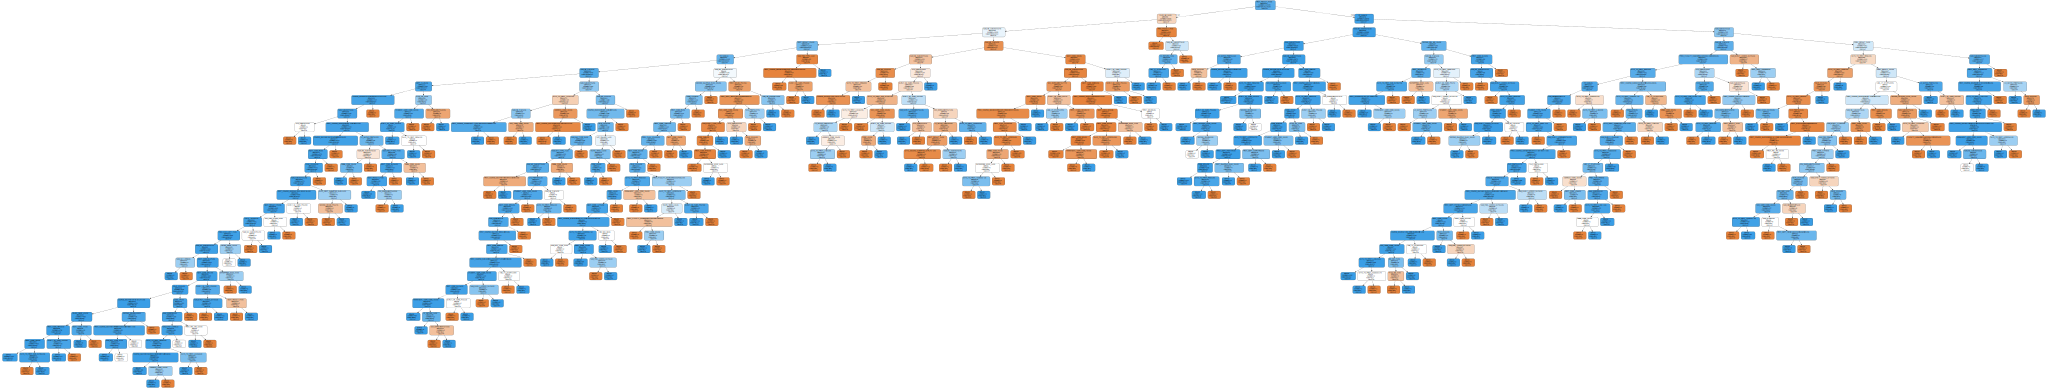

In [22]:
graph

In [23]:
graph.render("../figures/tree.dot") # dot -Tpdf -O figures/graph.dot

'../figures/tree.dot.pdf'